In [1]:
from pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

# Plot fading line collection

In [2]:
# rgba cmap
n = 20
colors = np.tile(np.array([0.20392156862745098, 0.6862745098039216, 0.9294117647058824]),(n,1))
colors = np.append(colors,np.linspace(0.1,1,n).reshape(-1,1),axis=1)
cmap = ListedColormap(colors, name='blue', N=n)

In [3]:
# line collection
x = np.linspace(50,70,n)
y = np.linspace(80,90,n)
points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, linewidth=3)
lc.set_array(np.linspace(0,1,n))

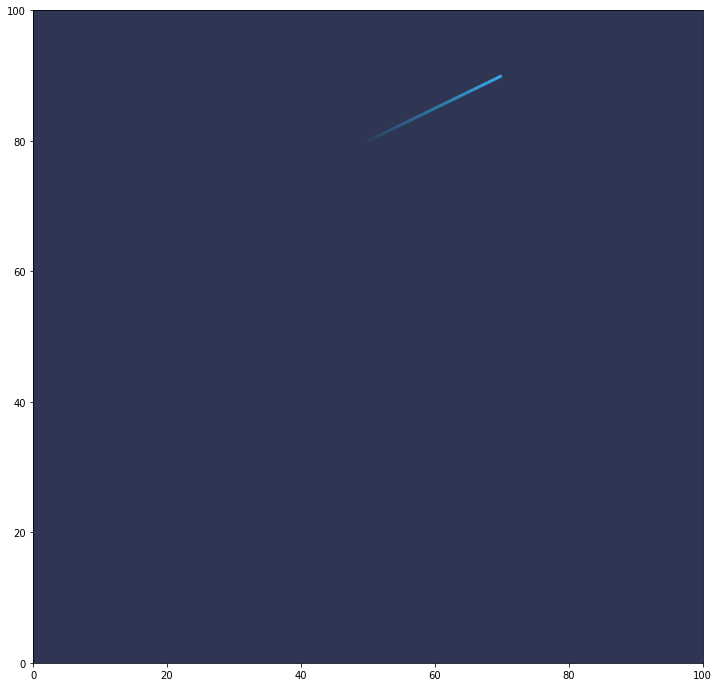

In [4]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,12))
axes.add_collection(lc)
axes.set_xlim(0,100)
axes.set_ylim(0,100)
axes.axvspan(0,100,0,1,facecolor='#2f3653')

# Statsbomb type xg plot

In [5]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

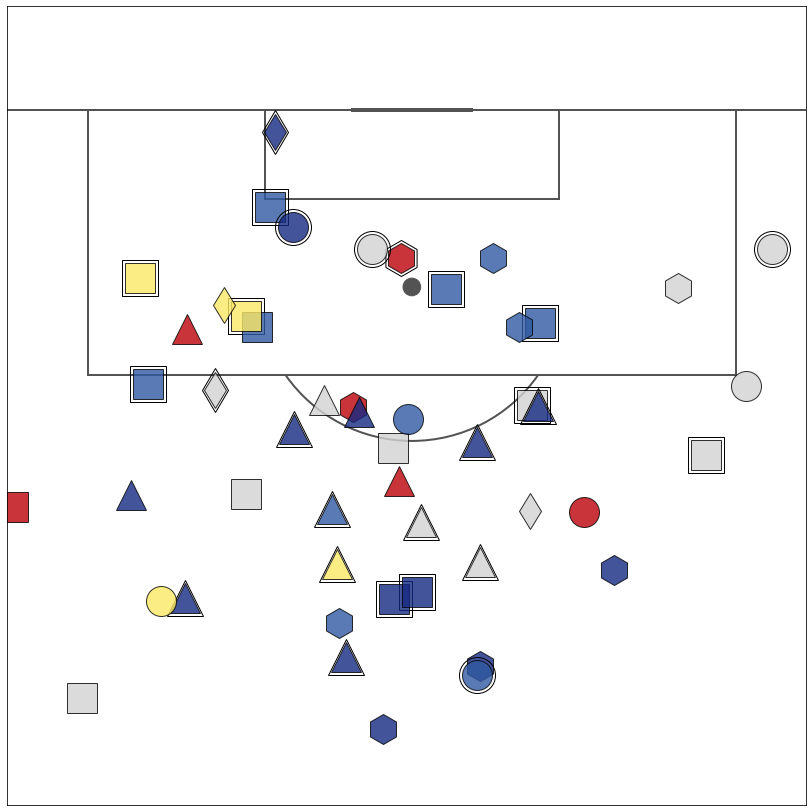

In [6]:
figsize = 820/72
pad = 1/72
markers = ['s','h','d','^','o']
marker_type = np.random.choice(markers,size=50)
colors = ['#152982','#2f59a1','#fce865','#d3d3d3','#bc010a']
color_type = np.random.choice(colors,50)
goal_type = np.random.choice([True,False],50)
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),pitch_color='white',
              line_color='#535353',figsize=(figsize,figsize),goal_type='line',axis=True,tight_layout=True,
              xpad=(-12.51,-13.25),ypad=(-12.82,7.06))
fig, ax = pitch.draw()
for i in range(5):
    marker = markers[i]
    x_marker = x[marker_type==marker]
    y_marker = y[marker_type==marker]
    color_marker = color_type[marker_type==marker]
    goal_marker = goal_type[marker_type==marker]
    x_marker_goal = x_marker[goal_marker]
    y_marker_goal = y_marker[goal_marker]
    if marker == 'd':
        markersize = 25
    else:
        markersize = 30
    pitch.scatter(x_marker_goal, y_marker_goal,marker=marker, markersize=markersize+6,
                  markerfacecolor="None",markeredgecolor='black',linestyle='None',linewidth=1,ax_num=0)
    for color in colors:
        x_marker_color = x_marker[color_marker==color]
        y_marker_color = y_marker[color_marker==color]
        pitch.scatter(x_marker_color,y_marker_color, marker=marker, c=color,markersize=markersize,
                      markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)
            
#fig.savefig('statsbomb.png',pad_inches=pad,bbox_inches='tight')

# Opta xA style plot

In [7]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=30, size=50)
x1 = np.random.normal(loc=60, scale=12, size=1000)
spare = np.random.uniform(50,100,size=1000)
x1[x1>100] = spare[x1>100]
x1[x1<0] = spare[x1<0]
y1 = np.random.normal(loc=50, scale=30, size=1000)
y1[y1>100] = spare[y1>100]
y1[y1<0] = spare[y1<0]

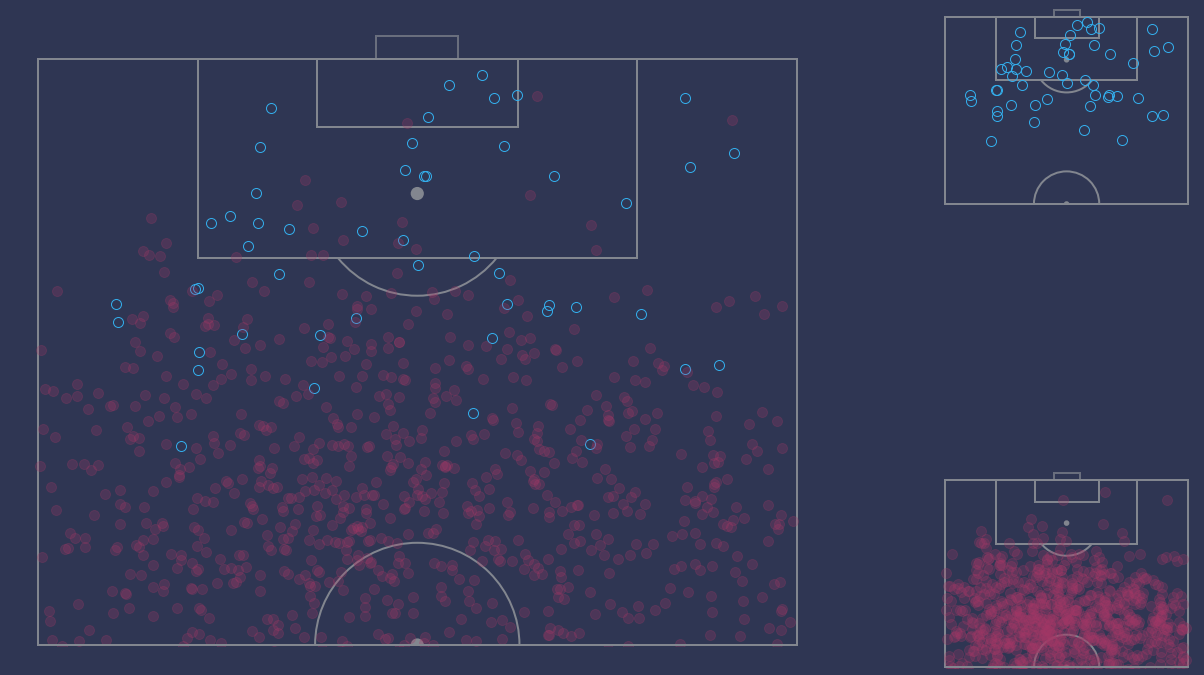

In [8]:
pad = 1/72
figsize1 = 1536/72
figsize2 = 1125/72
fig = plt.figure(figsize=(figsize1, figsize2),facecolor='#2f3653') 
gs = gridspec.GridSpec(2, 2, width_ratios=[3.13, 1])
ax1 = plt.subplot(gs[:, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 1])
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
              pitch_color='#2f3653',line_color='#82868f',goal_type='box',linewidth=2,xpad=(4,4),ypad=(0.2,4))
pitch.draw(ax1)
pitch.draw(ax2)
pitch.draw(ax3)
pitch.scatter(x,y, marker='o', color='None',markersize=10,linestyle='None',markeredgecolor='#34afed',ax=ax1)
pitch.scatter(x,y, marker='o', color='None',markersize=10,linestyle='None',markeredgecolor='#34afed',ax=ax2)
pitch.scatter(x1,y1, marker='o', color='#a43967',markersize=10,alpha=0.25,linestyle='None',ax=ax1)
pitch.scatter(x1,y1, marker='o', color='#a43967',markersize=10,alpha=0.25,linestyle='None',ax=ax3)
fig.savefig('opta.png',facecolor='#2f3653',pad_inches=pad,bbox_inches='tight')

# Statsbomb

In [9]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

#### Statsbomb vertical full

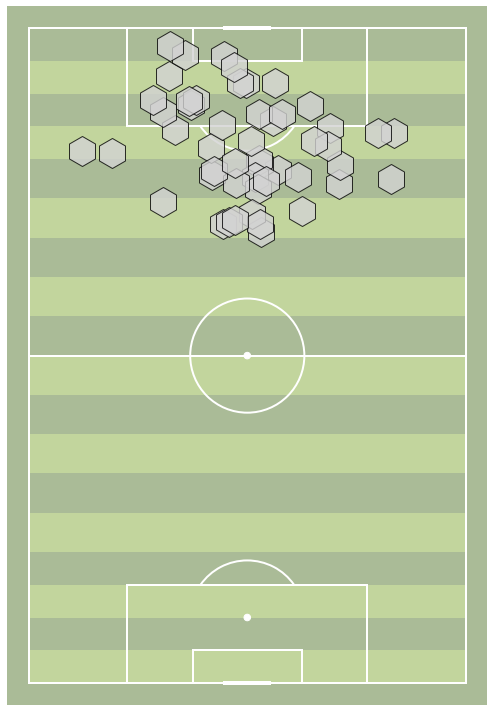

In [10]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Statsbomb horizontal full

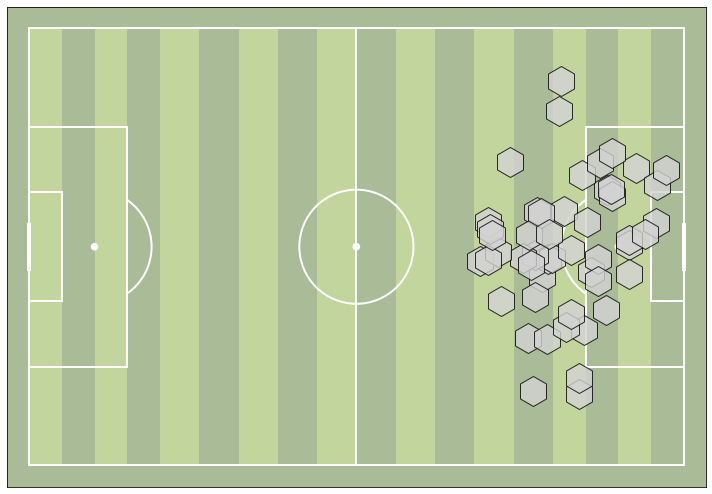

In [11]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Statsbomb Horizontal half

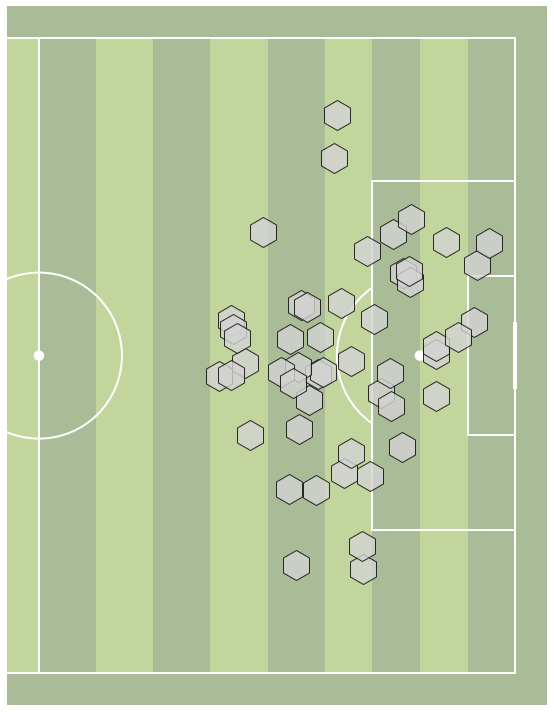

In [12]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Statsbomb Vertical half

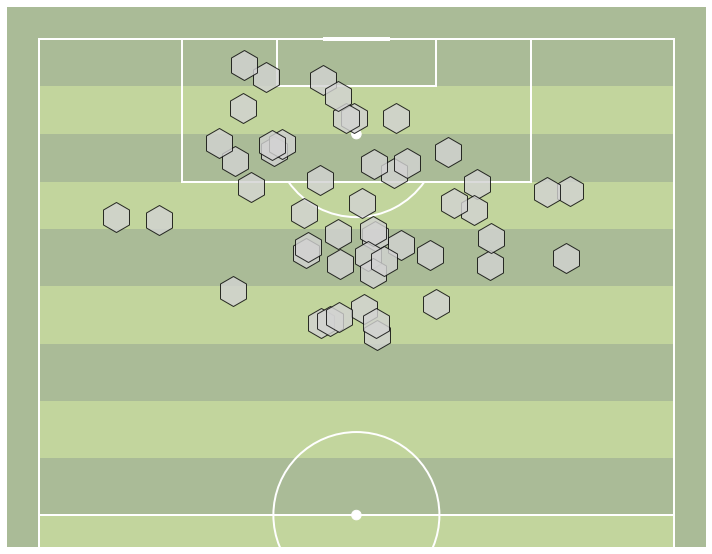

In [13]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,
              goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Opta

In [14]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### Opta vertical full

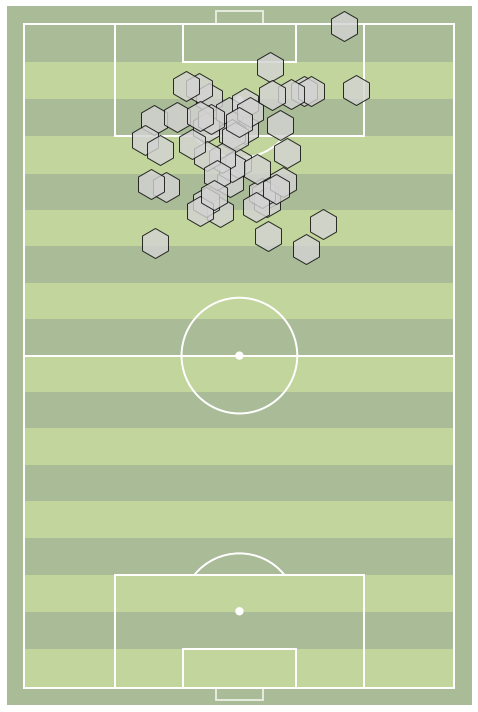

In [15]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),stripe=True,
                      goal_type='box')
fig, ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Opta horizontal full

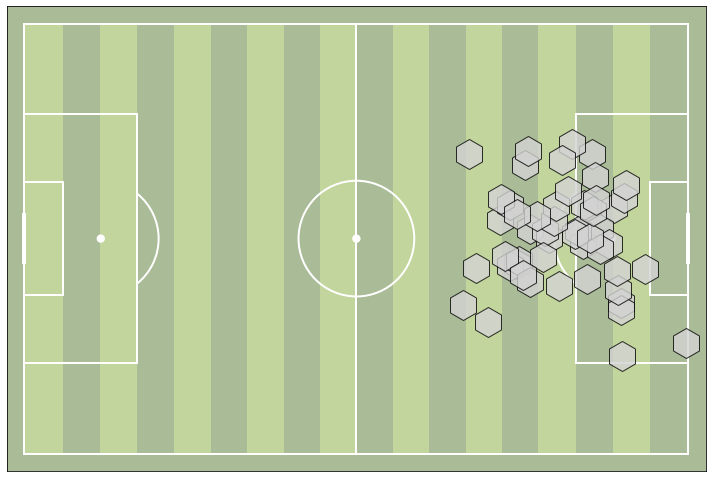

In [16]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Opta vertical half

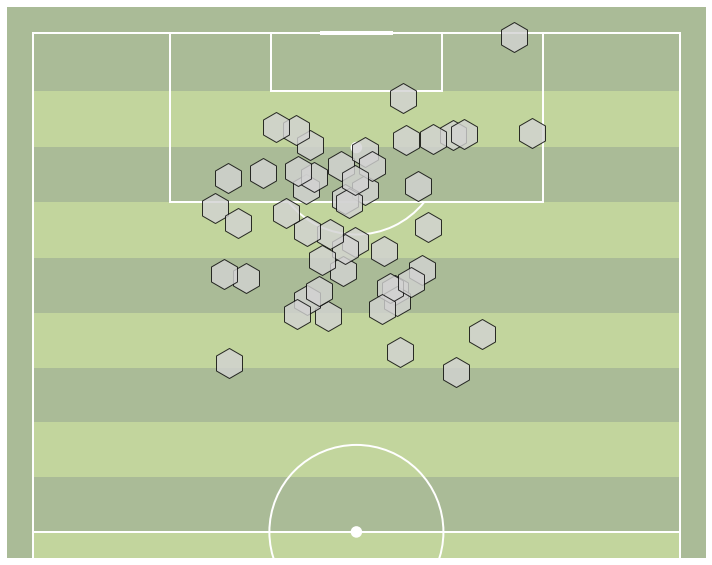

In [17]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Opta Horizontal half

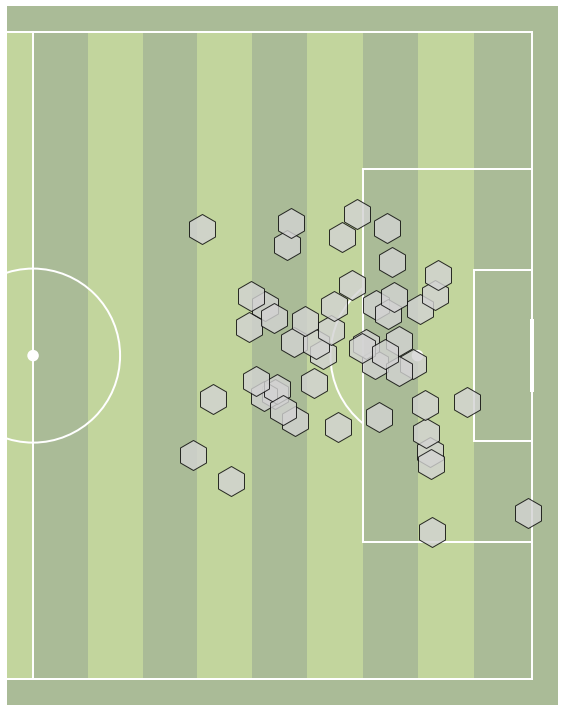

In [18]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Tracab

In [19]:
# generate data
x = np.random.normal(loc=3600, scale=700, size=50)
x[x>5250] = 4500
y = np.random.normal(loc=0, scale=1000, size=50)

#### Tracab vertical full

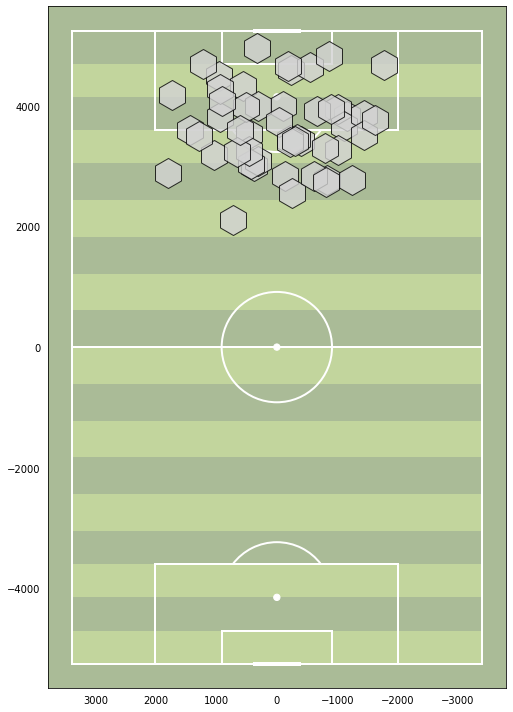

In [20]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Tracab horizontal full

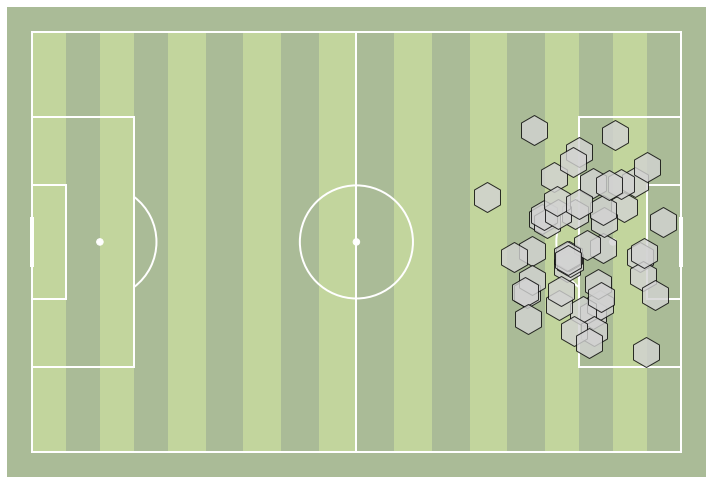

In [21]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Tracab vertical half

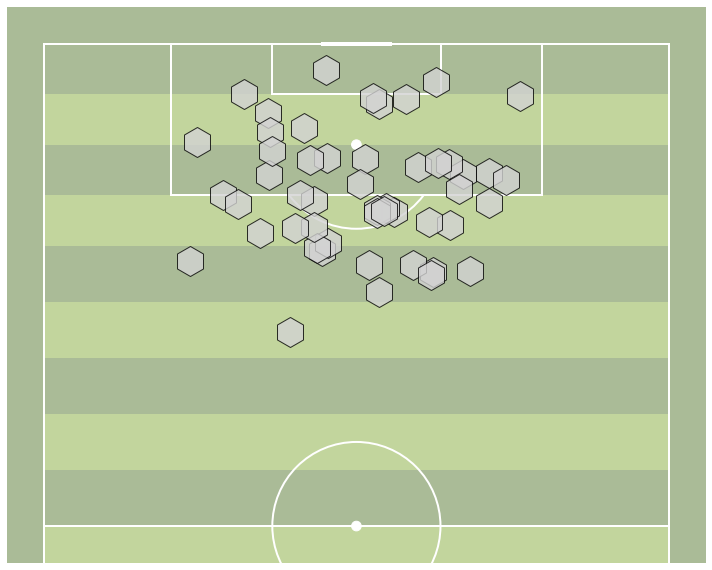

In [22]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Tracab Horizontal half

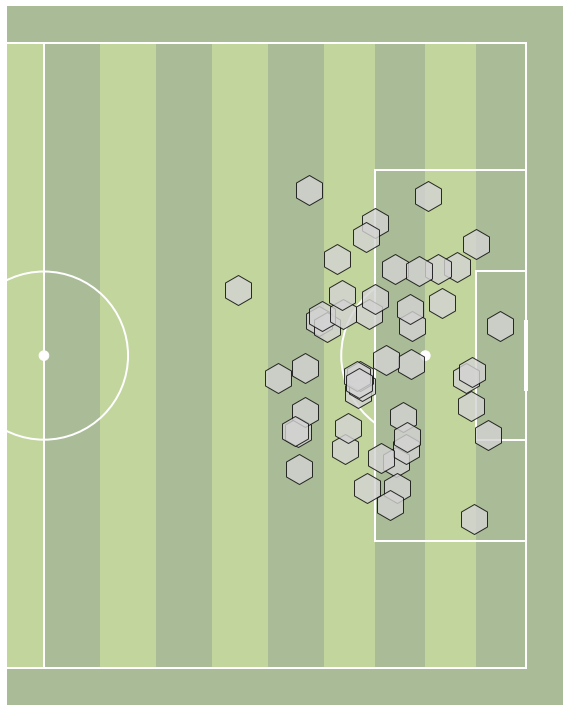

In [23]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Stats.com

In [24]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=35, scale=12, size=50)

#### stats.com vertical full

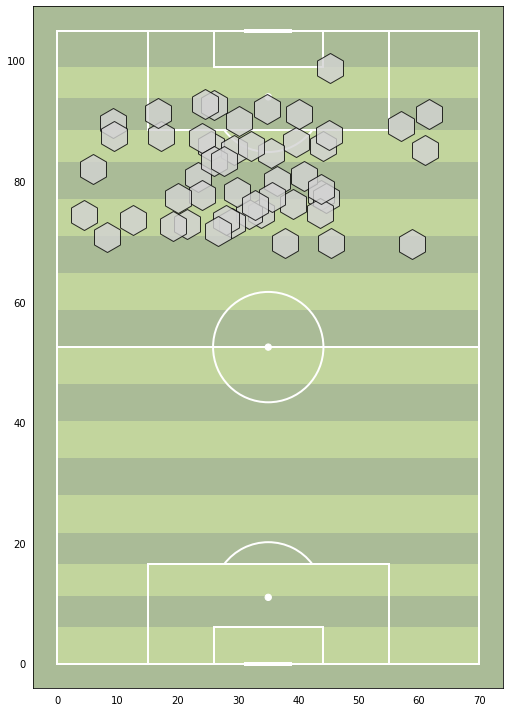

In [25]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='full',figsize=(10,10),stripe=True,axis=True,label=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### stats.com horizontal full

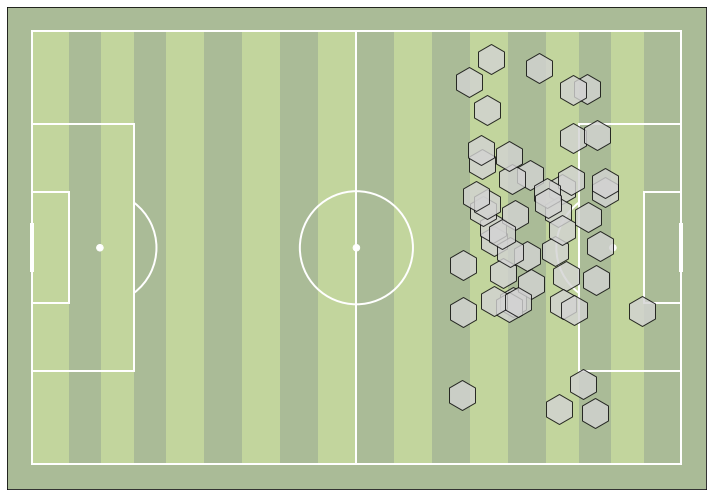

In [26]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### stats.com vertical half

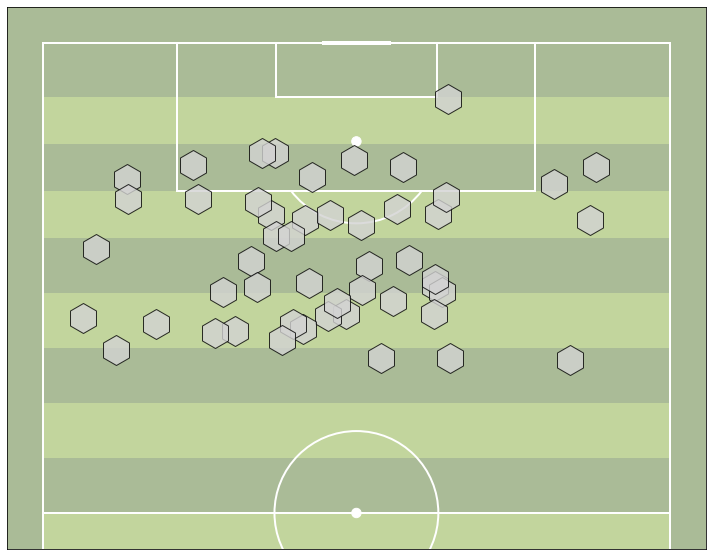

In [27]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### stats.com Horizontal half

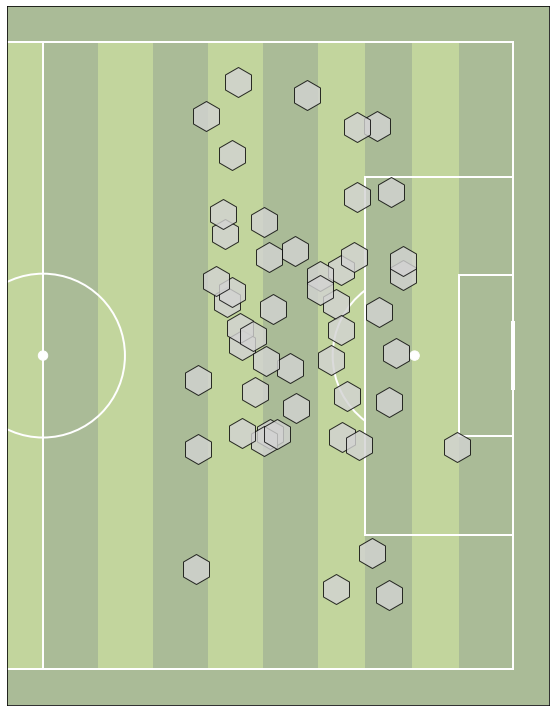

In [28]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Wyscout

In [29]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### wyscout vertical full

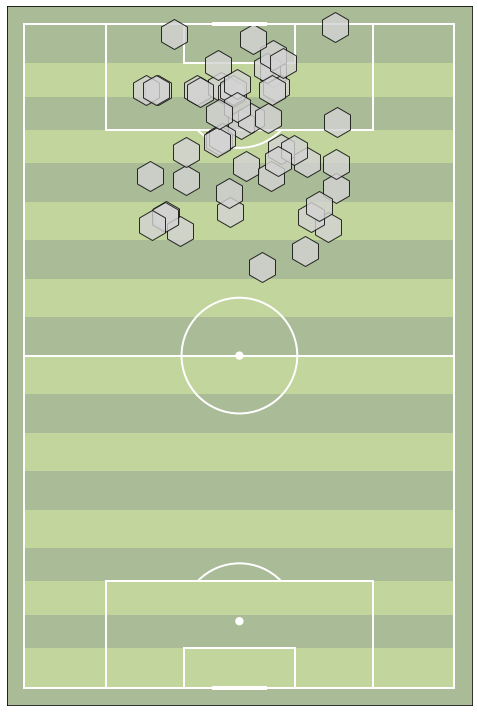

In [30]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='full',figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### wyscout horizontal full

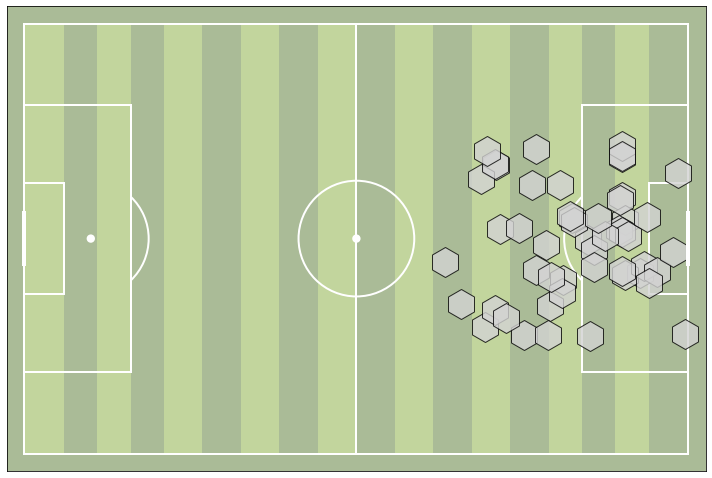

In [31]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### wyscout vertical half

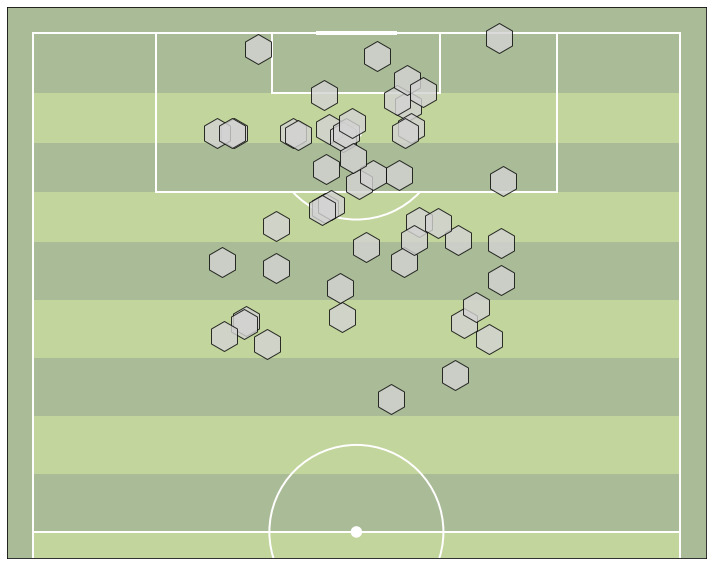

In [32]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### wyscout Horizontal half

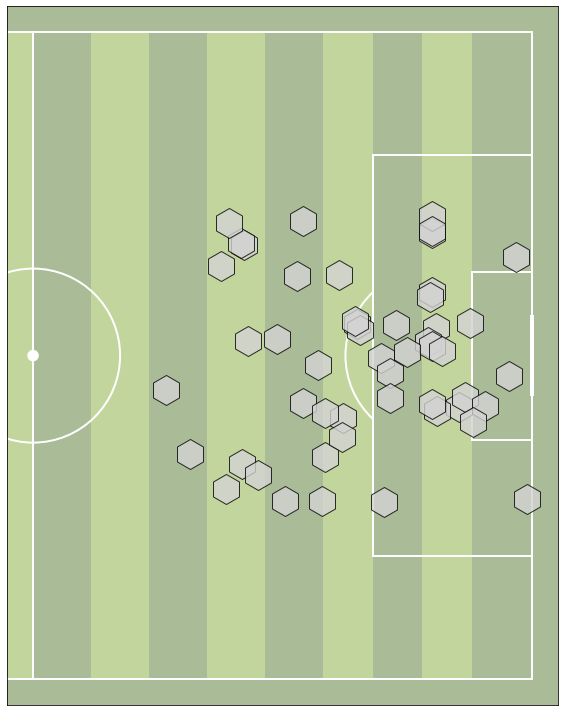

In [33]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
              goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Plot multiple

In [34]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

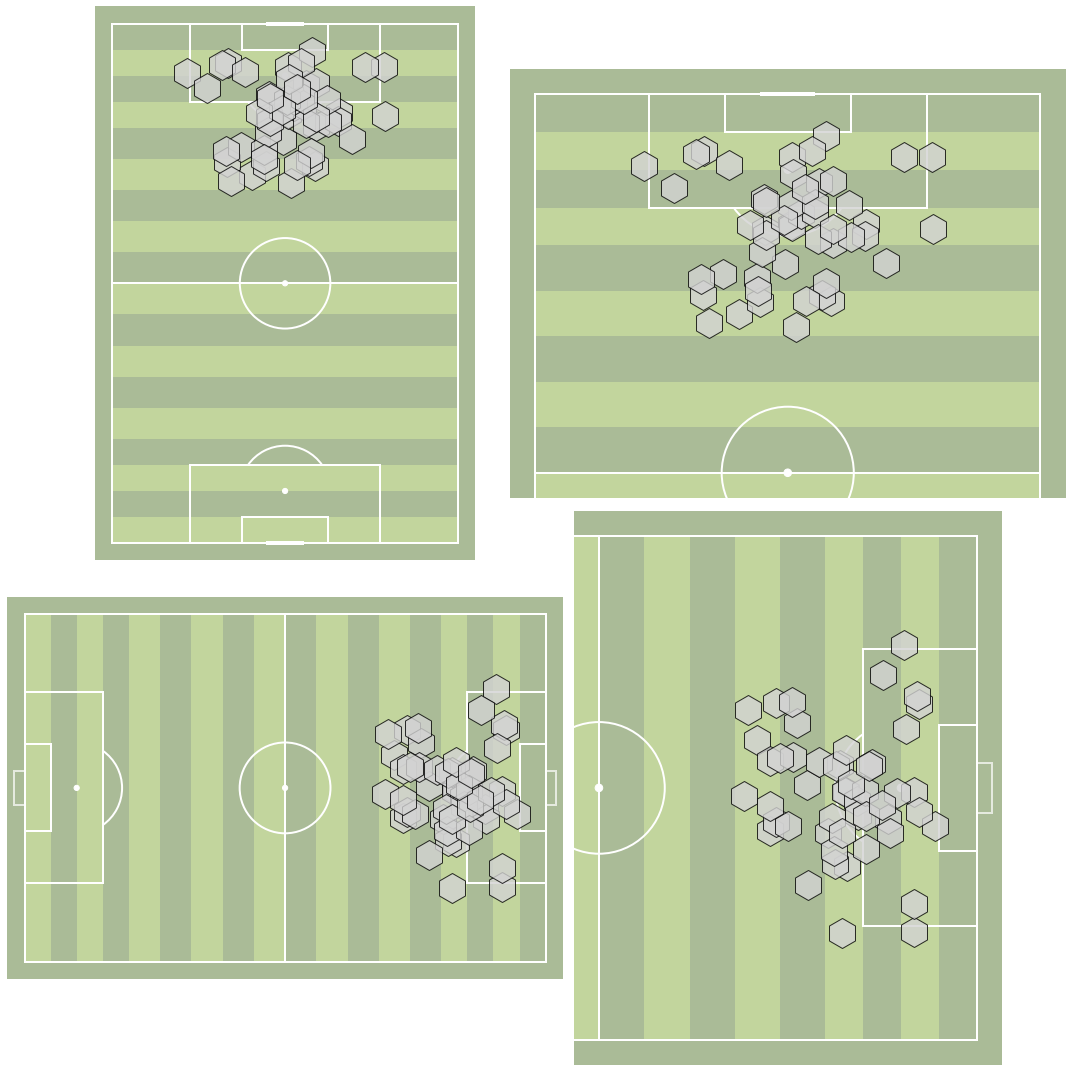

In [35]:
pitch_vf = Pitch(pitch_type='statsbomb',orientation='vertical',view='full', goal_type='line',stripe=True)
pitch_vh = Pitch(pitch_type='statsbomb',orientation='vertical',view='half', goal_type='line',stripe=True)
pitch_hf = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full', goal_type='box',stripe=True)
pitch_hh = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half', goal_type='box',stripe=True)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
pitch_vf.draw(axes[0,0])
pitch_vh.draw(axes[0,1])
pitch_hf.draw(axes[1,0])
pitch_hh.draw(axes[1,1])
pitch_vf.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=axes[0,0])
pitch_vh.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=axes[0,1])
pitch_hf.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=axes[1,0])
pitch_hh.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=axes[1,1])
fig.set_tight_layout(True)